In [1]:
import nxsdk.api.n2a as nx
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
from gridAgent import *

In [3]:
grid_x = 5
grid_y = 5
dimensions = 2

n_states = grid_x * grid_y
n_actions = 4
n_estimates = n_states * n_actions

In [4]:
n_estimates

100

In [5]:
t_epoch = 50
n_epochs = 100

In [6]:
agent = GridAgent(n_epochs=n_epochs, debug=True)

In [7]:
agent.hippocampus.blocks

{'feedback_delay': <primitives.OrNode at 0x7f8d307ef470>,
 'feedback_sum': <primitives.OrNode at 0x7f8d30853828>,
 'filter': <primitives.AndNode at 0x7f8d3085f278>,
 'punishment_buffer': <primitives.OrNode at 0x7f8d307ef048>,
 'punishment_gate': <primitives.AndNode at 0x7f8d30853ac8>,
 'reward_buffer': <primitives.OrNode at 0x7f8d307efef0>,
 'reward_gate': <primitives.AndNode at 0x7f8d307ef9e8>,
 'state_memory': <primitives.FlipFlopNode at 0x7f8d3085fbe0>}

In [8]:
#dec_spks = agent.decoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [9]:
#enc_spks = agent.encoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [10]:
#hc_spks = agent.hippocampus.blocks['state_memory'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [11]:
ctx_spks = agent.cortex.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [12]:
agent.transitions

array([[[1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]]])

In [13]:
agent.transitions[0,:,4]

array([0, 0, 0, 0, 0])

In [14]:
agent.transitions[1,4,:]

array([0, 0, 0, 0, 0])

In [15]:
net = agent.network

In [16]:
results = []
runs = 1
for i in range(runs):
    results.append(agent.run(n_epochs))

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.106:43049
INFO:DRV:      Host server up..............Done 0.19s
INFO:DRV:      Encoding axons/synapses.....Done 0.23s
INFO:DRV:      Compiling Embedded snips....Done 0.38s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592438374.2577899/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 2.02s
INFO:DRV:      Encoding probes.............Done 1.17ms
INFO:DRV:      Transferring probes.........Done 4.65ms
INFO:DRV:      Configuring registers.......Done 0.13s
INFO:DRV:      Transferring spikes.........Done 1.09ms
INFO:HST:  chip=0 cpu=0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
INFO:HST:  chip=0 cpu=0 Setting up...
INFO:HST:  chip=0 cpu=0 Got variables
INFO:HST:  chi

INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=4
INFO:HST:  chip=0 cpu=0 DEBUG: state 21 core 4 axon 1020 t3200
INFO:HST:  chip=0 cpu=0 DEBUG : action 2 core 4 axon 1026 t3328
INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=3
INFO:HST:  chip=0 cpu=0 DEBUG: state 16 core 4 axon 1015 t3328
INFO:HST:  chip=0 cpu=0 DEBUG : action 1 core 4 axon 1025 t3456
INFO:HST:  chip=0 cpu=0 DEBUG: X=2 Y=3
INFO:HST:  chip=0 cpu=0 DEBUG: state 17 core 4 axon 1016 t3456
INFO:HST:  chip=0 cpu=0 DEBUG : action 3 core 4 axon 1027 t3584
INFO:HST:  chip=0 cpu=0 DEBUG: New episode started
INFO:HST:  chip=0 cpu=0 DEBUG: punishment, core 5 axon 910 t3584
INFO:HST:  chip=0 cpu=0 DEBUG: X=3 Y=0
INFO:HST:  chip=0 cpu=0 DEBUG: state 3 core 4 axon 1002 t3584
INFO:HST:  chip=0 cpu=0 DEBUG : action 0 core 4 axon 1024 t3712
INFO:HST:  chip=0 cpu=0 DEBUG: X=3 Y=1
INFO:HST:  chip=0 cpu=0 DEBUG: state 8 core 4 axon 1007 t3712
INFO:HST:  chip=0 cpu=0 DEBUG : action 0 core 4 axon 1024 t3840
INFO:HST:  chip=0 cpu=0 DEBUG: X=3 Y=2
INFO:HST:  chip=0

INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=0
INFO:HST:  chip=0 cpu=0 DEBUG: state 1 core 4 axon 1000 t7424
INFO:HST:  chip=0 cpu=0 DEBUG : action 0 core 4 axon 1024 t7552
INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=1
INFO:HST:  chip=0 cpu=0 DEBUG: state 6 core 4 axon 1005 t7552
INFO:HST:  chip=0 cpu=0 DEBUG : action 2 core 4 axon 1026 t7680
INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=0
INFO:HST:  chip=0 cpu=0 DEBUG: state 1 core 4 axon 1000 t7680
INFO:HST:  chip=0 cpu=0 DEBUG : action 3 core 4 axon 1027 t7808
INFO:HST:  chip=0 cpu=0 DEBUG: X=0 Y=0
INFO:HST:  chip=0 cpu=0 DEBUG: state 0 core 4 axon 999 t7808
INFO:HST:  chip=0 cpu=0 DEBUG : action 3 core 4 axon 1027 t7936
INFO:HST:  chip=0 cpu=0 DEBUG: X=0 Y=0
INFO:HST:  chip=0 cpu=0 DEBUG: state 0 core 4 axon 999 t7936
INFO:HST:  chip=0 cpu=0 DEBUG : action 3 core 4 axon 1027 t8064
INFO:HST:  chip=0 cpu=0 DEBUG: X=0 Y=0
INFO:HST:  chip=0 cpu=0 DEBUG: state 0 core 4 axon 999 t8064
INFO:HST:  chip=0 cpu=0 DEBUG : action 2 core 4 axon 1026 t8192
INFO:HST:  ch

INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=3
INFO:HST:  chip=0 cpu=0 DEBUG: state 16 core 4 axon 1015 t11648
INFO:HST:  chip=0 cpu=0 DEBUG : action 1 core 4 axon 1025 t11776
INFO:HST:  chip=0 cpu=0 DEBUG: X=2 Y=3
INFO:HST:  chip=0 cpu=0 DEBUG: state 17 core 4 axon 1016 t11776
INFO:HST:  chip=0 cpu=0 DEBUG : action 2 core 4 axon 1026 t11904
INFO:HST:  chip=0 cpu=0 DEBUG: New episode started
INFO:HST:  chip=0 cpu=0 DEBUG: reward, core 5 axon 909 t11904
INFO:HST:  chip=0 cpu=0 DEBUG: X=2 Y=4
INFO:HST:  chip=0 cpu=0 DEBUG: state 22 core 4 axon 1021 t11904
INFO:HST:  chip=0 cpu=0 DEBUG : action 3 core 4 axon 1027 t12032
INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=4
INFO:HST:  chip=0 cpu=0 DEBUG: state 21 core 4 axon 1020 t12032
INFO:HST:  chip=0 cpu=0 DEBUG : action 2 core 4 axon 1026 t12160
INFO:HST:  chip=0 cpu=0 DEBUG: X=1 Y=3
INFO:HST:  chip=0 cpu=0 DEBUG: state 16 core 4 axon 1015 t12160
INFO:HST:  chip=0 cpu=0 DEBUG : action 1 core 4 axon 1025 t12288
INFO:HST:  chip=0 cpu=0 DEBUG: X=2 Y=3
INFO:HST

In [17]:
agent.board.disconnect()

INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [18]:
results[-1]

(array([[1, 2, 0],
        [1, 3, 3],
        [0, 3, 3],
        [0, 3, 1],
        [1, 3, 3],
        [0, 3, 2],
        [0, 2, 3],
        [0, 2, 3],
        [0, 2, 3],
        [0, 2, 1],
        [4, 0, 3],
        [3, 0, 1],
        [4, 0, 1],
        [4, 0, 3],
        [3, 0, 2],
        [3, 4, 1],
        [4, 4, 1],
        [4, 4, 2],
        [4, 4, 2],
        [1, 4, 1],
        [2, 4, 0],
        [2, 0, 3],
        [1, 0, 2],
        [1, 4, 1],
        [2, 4, 3],
        [1, 4, 2],
        [1, 3, 1],
        [2, 3, 3],
        [3, 0, 0],
        [3, 1, 0],
        [3, 2, 3],
        [2, 4, 0],
        [2, 0, 1],
        [3, 0, 1],
        [4, 0, 0],
        [4, 0, 0],
        [4, 0, 2],
        [4, 0, 3],
        [3, 0, 0],
        [3, 1, 3],
        [1, 1, 3],
        [0, 1, 2],
        [0, 0, 0],
        [0, 1, 1],
        [1, 1, 1],
        [2, 1, 3],
        [1, 1, 1],
        [2, 1, 1],
        [3, 1, 0],
        [4, 3, 0],
        [4, 3, 3],
        [3, 3, 2],
        [3, 

In [19]:
results[-1][0].shape

(100, 3)

In [20]:
data = results[-1][0]

In [21]:
np.unique(data[:,0])

array([0, 1, 2, 3, 4])

In [22]:
np.unique(data[:,1])

array([0, 1, 2, 3, 4])

In [23]:
np.unique(data[:,2])

array([0, 1, 2, 3])

(array([23.,  0., 23.,  0.,  0., 23.,  0., 19.,  0., 12.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

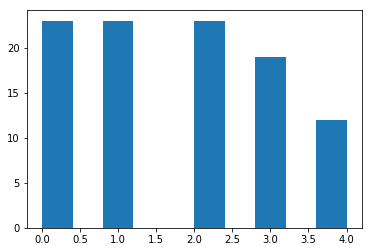

In [24]:
plt.hist(results[-1][0][:,0])

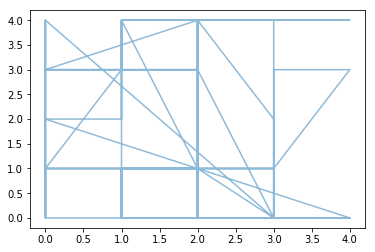

In [26]:
plt.plot(results[-1][0][:,0], results[-1][0][:,1], alpha=0.50)

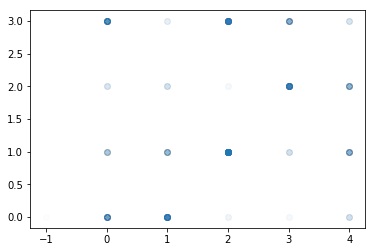

In [22]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

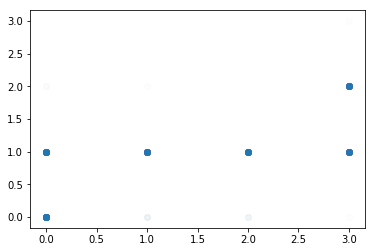

In [21]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

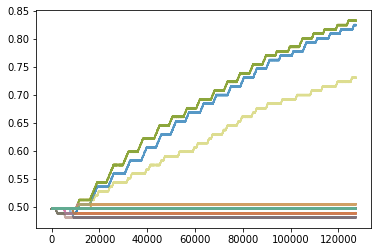

In [26]:
avglen = agent.l_epoch * 5

for i in range(100):
    plt.plot(np.convolve(ctx_spks[0].data[i,:],np.ones(avglen), mode='valid')/avglen, alpha=0.5)